In [43]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import model_selection
from matplotlib import pyplot as plt

In [44]:
data = pd.read_csv("../datasets/TON_IoT-Datasets/Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Modbus.csv")

In [45]:
data_features = data.iloc[:,[3, 4, 5, 6, 7]]
data_labels = data_features.pop('label')
data_features.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil
0,49389,52921,25770,13625
1,49389,52921,25770,13625
2,49389,52921,25770,13625
3,49389,52921,25770,13625
4,40665,44748,21098,35371


In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_features, data_labels, test_size=0.33)

In [47]:

iot_model = tf.keras.Sequential([
  tf.keras.layers.Dense(4),
  tf.keras.layers.Dense(8),
  tf.keras.layers.Dense(1)
])

iot_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam(),
                      metrics= ['acc'])



In [48]:
history = iot_model.fit(X_train, y_train, validation_split = 0.1, epochs=10, batch_size=8)


Epoch 1/10
3852/3852 [==============================] - 4s 891us/step - loss: 177949616.0000 - acc: 0.5181 - val_loss: 0.3211 - val_acc: 0.5507
Epoch 2/10
3852/3852 [==============================] - 3s 847us/step - loss: 0.2400 - acc: 0.6364 - val_loss: 0.2194 - val_acc: 0.6867
Epoch 3/10
3852/3852 [==============================] - 3s 850us/step - loss: 0.4130 - acc: 0.5651 - val_loss: 0.9666 - val_acc: 0.4742
Epoch 4/10
3852/3852 [==============================] - 3s 860us/step - loss: 1781.9669 - acc: 0.5136 - val_loss: 14.5558 - val_acc: 0.6981
Epoch 5/10
3852/3852 [==============================] - 3s 859us/step - loss: 1263.3743 - acc: 0.5123 - val_loss: 23.3211 - val_acc: 0.2964
Epoch 6/10
3852/3852 [==============================] - 3s 856us/step - loss: 982.0460 - acc: 0.5080 - val_loss: 1.8359 - val_acc: 0.4850
Epoch 7/10
3852/3852 [==============================] - 3s 849us/step - loss: 548.3682 - acc: 0.5299 - val_loss: 22.8238 - val_acc: 0.5118
Epoch 8/10
3852/3852 [=====

In [49]:
results = iot_model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

528/528 [==============================] - 0s 673us/step - loss: 0.2228 - acc: 0.6772
test loss, test acc: [0.22276680171489716, 0.6772013306617737]


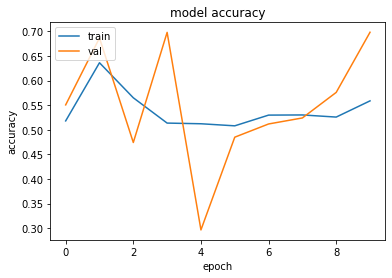

In [50]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

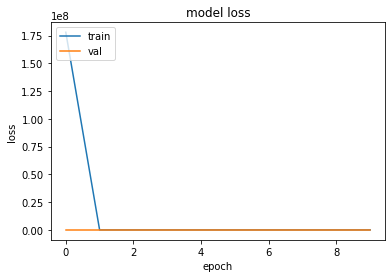

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()